In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Example 1: Normal samples using `np.random` API
Here is a simple example to demonstrate how to accquire random variables off the shelf

Text(0.5, 1.0, 'Normal variable histogram')

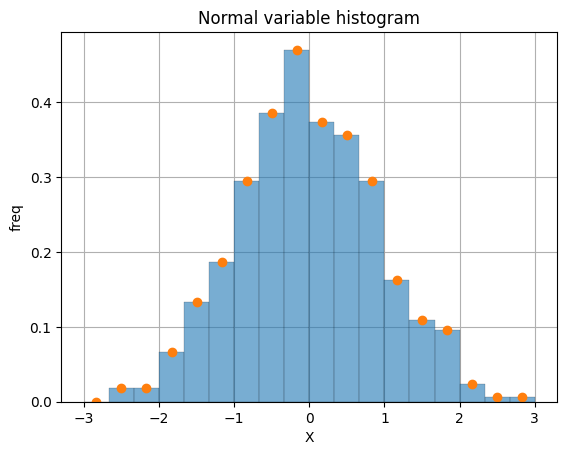

In [4]:

x = np.random.normal(size=500)

n, bins, _ = plt.hist(x, bins=18, range=(-3, 3), density=True, histtype='barstacked', edgecolor='#0A0A0C', linewidth=.2, alpha=.6, zorder=2)
m_bins = np.convolve(bins, [1, 1], 'valid')/2
plt.plot(m_bins, n, ls="none", marker="o")
plt.grid()
plt.xlabel('X'); plt.ylabel('freq'); plt.title('Normal variable histogram')

### Example 2: The verification of CLT
We first draw uniform samples $u \sim U(0, 1)$ many times,
then caculate the mean value of that sample group.

The process above has been done quite a lot, finally to check if the means obey a normal distribution


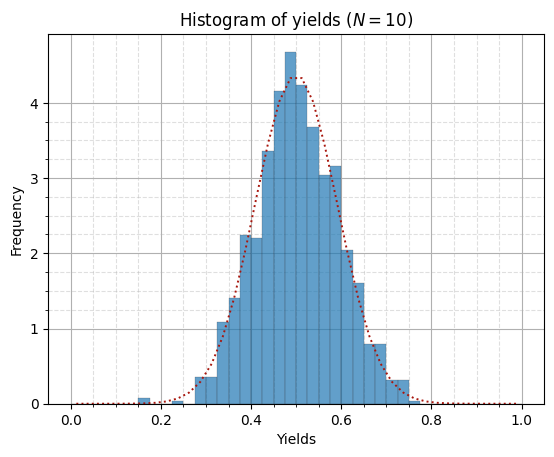

In [3]:
import math

from cavas_util import set_minor_ticks

set_minor_ticks(plt.gca())

avg_num, sam_num = 10, 1000
mu, var = .5, 1/(12*avg_num)
normal_factor = 1/math.sqrt(2*math.pi*var)

m = np.random.rand(avg_num, sam_num).mean(axis=0)

freqs, bins, _ = plt.hist(m, bins=40, range=(0, 1), density=True, edgecolor='#382a29', linewidth=.2, alpha=.7, zorder=2)
bins = np.convolve(bins, [1, 1], 'valid')/2

density_truth = normal_factor*np.exp(-.5*(bins-mu)**2/var)
plt.plot(bins, density_truth, c='#a8160d', lw=1.4, ls='dotted')

set_minor_ticks(plt.gca())
plt.grid(which='both')
plt.grid(which='minor', alpha=.4, ls='--')
plt.title(r'Histogram of yields ($N={}$)'.format(avg_num)); plt.xlabel('Yields'); plt.ylabel('Frequency')

plt.savefig('e1.png', format='png', dpi=126)

### Example 3: A A demonstration to ICDF method
The sample comes from an exponetial distribution with $\lambda=1$, the ICDF is:
$$
F^{-}(x) = -\ln (1-u)
$$

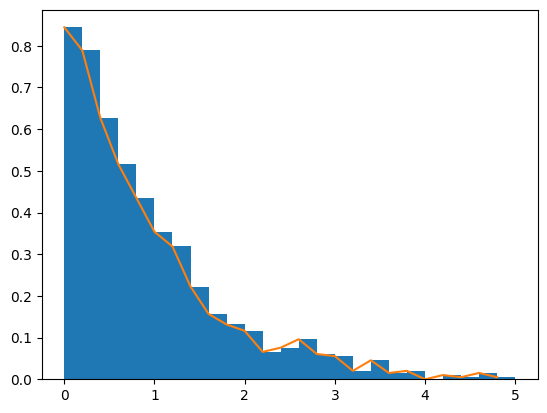

In [3]:
# Example 3: A demonstration to ICDF method
# where samples come from an exponetial distribution with $\lambda=1$
u = np.random.rand(1000)

x = -np.log(1-u) # $ x\sim E(1)$ 
n, bins, _ = plt.hist(x, bins=25, range=(0, 5), density=True)
plt.plot(bins[:-1], n)

### Example 4: Accept-reject method 
Here we want to sample $x \sim N(0, 1)I(0\le x \le 1)$, let the proposal distribution as **the uniform distribution**


The M factor should be 1.1687533848990237


Text(0.5, 1.0, 'PDF of the proposal & original')

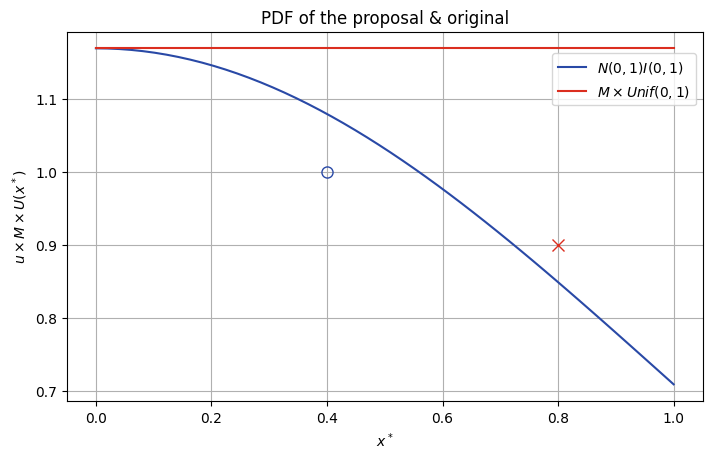

In [4]:
# Example 4: A demonstration to Accept-Reject method
import math

from samplers import acce_rej_sampling

truncated_c = 1/((0.84134-.5)*math.sqrt(2*math.pi)) # $\Phi(1) \approx .84134 $ 
print(f'The M factor should be {truncated_c}')

# generate the pdf line
x = np.linspace(0, 1, 50)
f = np.exp(-x**2/2)*truncated_c

# generate the samples
tx, ty, fx, fy = acce_rej_sampling(
    lambda x: np.exp(-x**2/2)*truncated_c, 
    lambda x: np.ones_like(x),
    lambda sz: np.random.rand(sz), 
    sz=1000,
    m = truncated_c+.01,
    simple_return=False)

plt.figure(figsize=(8.2, 4.8))
# Draw pdf curve
plt.plot(x, f, label=r'$N(0, 1)I(0,1)$', c='#2949a6')
plt.plot([0, 1], [truncated_c, truncated_c], label=r'$M\times Unif(0, 1)$', c='#db2e1f')
# Draw example sample points
plt.plot(*[0.4, 1.0], marker='o', mfc='none', ms=8, c='#2949a6'); plt.plot(*[.8, .9], marker='x', mfc='none', ms=8, c='#db2e1f')
# # Draw true sampels 
# plt.plot(tx, ty, linestyle='none', marker='o', mfc='none')
# plt.plot(fx, fy, linestyle='none', marker='x', mfc='none')

# # Plot histgram
# plt.hist(tx, bins=10, range=(0, 1), density=True, label='Freq histogram', color='#6ab1f7', rwidth=.8)
# Plot settings
plt.grid(); plt.xlabel(r'$x^*$'); plt.ylabel(r'$u\times M \times U(x^*)$')
plt.legend(loc=1, bbox_to_anchor=(1, 0.96))
plt.title('PDF of the proposal & original')
# plt.title('Accept-reject samples')


## Example 5: Metropolis-Hastings
A demonstration of the random walk Metroplis_Hasting algorithm, the example distribution is:
$$
\pi(x) = \frac {C} {x^3}
$$

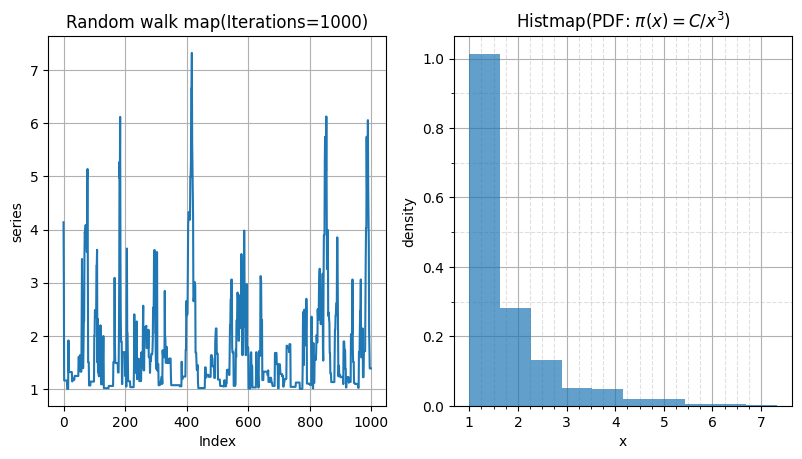

In [10]:
from samplers import get_ranwalk_MH_samples

n = 1000
r = np.array([s for s, _ in get_ranwalk_MH_samples(lambda x: 1/x**3 if x>=1 else 0, 1, n)])
# Plots
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.6 , 4.8))

ax1.plot(r)
ax1.set_xlabel('Index'); ax1.set_ylabel('series'); ax1.set_title(f'Random walk map(Iterations={n})')
ax1.grid()
ax2.hist(r, density=True, alpha=.7, zorder=2)
ax2.set_xlabel('x'); ax2.set_ylabel('density'); ax2.set_title(r'Histmap(PDF: $\pi(x)=C/x^3$)')
set_minor_ticks(ax2, 4, 2)
ax2.grid()
ax2.grid(which='minor', alpha=.4, ls='--')
plt.savefig('e5.png', format='png', dpi=126)

(0.18, 0.72)

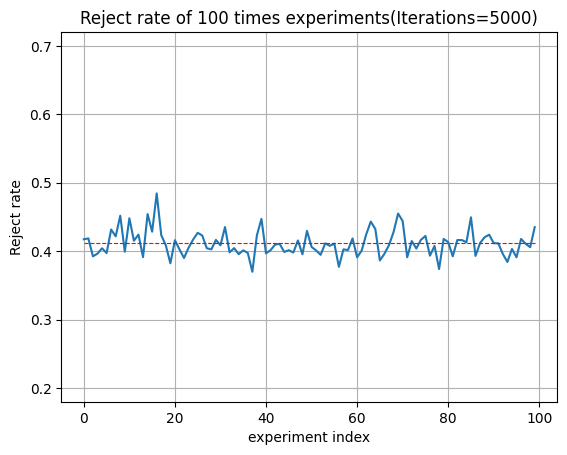

In [4]:
# Auxilary experiments 
# to study the reject rate of RW-MH method
pdf = lambda x: 1/x**3 if x>=1 else 0
x0 = 1
n = 5000
exp_cnt = 100

reject_rate = [sum([f for _, f in get_ranwalk_MH_samples(pdf, x0, n)])/n for _ in range(exp_cnt)]
mean_re_rate = sum(reject_rate)/exp_cnt

plt.plot(reject_rate)
plt.plot([0, exp_cnt-1], [mean_re_rate, mean_re_rate], 'r--', lw=.8)
plt.grid(); plt.xlabel('experiment index'); plt.ylabel('Reject rate')
plt.title(f'Reject rate of {exp_cnt} times experiments(Iterations={n})')
plt.ylim([.18, .72])

## Example 6: Gibbs sampling 
consider the conditional probability on the sampled distribution is:
$$
X_1 \mid X_2=x_2 \sim N(\rho x_2, 1-\rho^2)\\X_2 \mid X_1=x_1 \sim N(\rho x_1, 1-\rho^2)
$$

In [12]:
# Example 6: Gibbs sampling
import random

from cavas_util import draw_path
from samplers import gen_bivariate_sample, get_sample, get_trajection

rho = .9
bivariate_noraml_sampler = lambda rho: gen_bivariate_sample(
        lambda y: random.gauss(rho*y, 1-rho**2),
        lambda x: random.gauss(rho*x, 1-rho**2),
        0, 0
    )
bn_sampler = bivariate_noraml_sampler(rho)

stop_iter=10
sample_iters = 200
samples = np.array([get_sample(bn_sampler) for _ in range(sample_iters)])

trajection = get_trajection(bn_sampler, 0, 0, 10)

(0.010825001358480649, -0.13744204029546342)
(-0.31842970021881556, -0.45439380751046327)
(-0.16980513816037784, -0.20818423251921495)
(-0.2778899377437242, -0.2645640484174405)
(-0.12286701336886109, 0.1675739728109592)
(-0.04527469142080634, -0.3296948434151519)
(-0.07737073227023411, -0.28810664757662025)
(-0.3077274410141577, -0.0005731227597844946)
(-0.16070903832711786, -0.2723588853164961)
(-0.2793920656822747, -0.19036593432850712)
(-0.19555255609488298, 0.0012607449626980127)


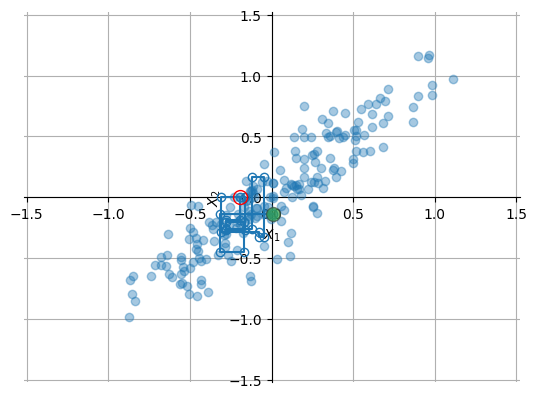

In [14]:
ax = plt.gca()
ax.set_xlim([-1.52, 1.52]); ax.set_ylim([-1.52, 1.52])
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.grid()
ax.scatter(samples[:, 0], samples[:, 1], alpha=.4, zorder=3)
draw_path(trajection[0], trajection[1], ax=ax, marker='o', mfc='none', zorder=4)
plt.plot(trajection[0][0], trajection[1][0], mfc="#35A447", marker="o", mec="#3A4D3E", ms=10, alpha=.7, zorder=5)
plt.plot(trajection[0][-1], trajection[1][-1], mfc="none", marker="o", mec="r", ms=10, zorder=5)
plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$')
plt.savefig('e6.png', format='png', dpi=126)

## Example 7:
The visualization of "shrinkage" algorithm

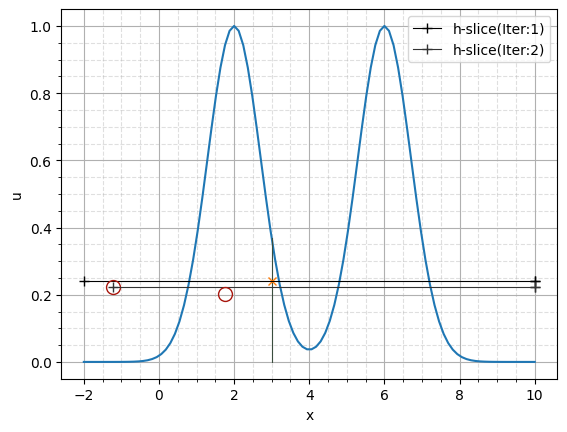

In [4]:
import random

from cavas_util import draw_path, set_minor_ticks


def shrinkage_sample(f, x0, u, intveral=None):
    if intveral is None: return x0

    while True:
        x = intveral[0] + random.random()*(intveral[1]-intveral[0])
        if f(x)>u:
            return x
        if x<x0:
            intveral[0]=x
        elif x>x0:
            intveral[1]=x
        else:
            raise StopIteration

f_density = lambda x: np.exp(-(x-2)**2)+np.exp(-(x-6)**2)

# Draw pdf 
tlst = np.linspace(-2, 10, 100)
ax = plt.subplot()
ax.plot(tlst, f_density(tlst))

# Shrinkage algorithm
x0 = random.randint(2, 6)
l, r = [-2, 10]

# Draw vertical slice
ax.plot([x0, x0], [0, f_density(x0)], c='#3a4d3e', lw=.8)
u = f_density(x0)*random.random()
ax.plot(x0, u, marker='x')

b = 0
while True:
    # Draw horizontal slice   c='#344538'
    draw_path([l, r], [u-b, u-b], lw=.8, marker='+', ms=7, c=str(min(1, b*10)), label=f'h-slice(Iter:{round(b/.02)+1})')
    b+=.02
    # Draw current sample
    x = l + random.random()*(r-l)
    ax.plot(x, u-b, c='#a8160d', marker='o', mfc='none', ms=10)

    # Accept or not 
    if f_density(x)>u:
        break

    if x<x0:
        l = x
    else:
        r = x

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
set_minor_ticks(ax)
ax.grid()
ax.grid(which='minor', alpha=.4, ls='--')
plt.savefig('shrinkage.svg', format='svg')
    

In [17]:
def doubling_interval(f, x0, u, m, k):
    '''
    Parameters:
    f -- The function proportional to the density,
        or the frenquency array sits on each samples
    x0 -- current sample point(univariate)
    u -- the vertical level defining the slice, while
        u \mid x \sim U(0, f(x))
    m -- typical estimate of a slice
    k -- 
    '''
    assert isinstance(k, int)

    # Get "the first" interval
    l = x0-m*random.random()
    r = l+m
    while f(l)>u or f(r)>u:
        int_len = r-l
        v = random.random()
        if v<.5:
            l = l-int_len
        else:
            r = r+int_len

        k-=1
        if k==0:
            break
    return l, r

def stepping_interval(f, x0, u, m, k):
    l = x0-m*random.random()
    r = l+m

    l_nlim = k*random.random()//1
    r_nlim = k-l_nlim-1
    while l_nlim>0:
        if f(l)<=u:
            break
        l -= m
        l_nlim -= 1
    
    while r_nlim>0:
        if f(r)<=u:
            break
        r += m
        r_nlim -= 1

    return l, r


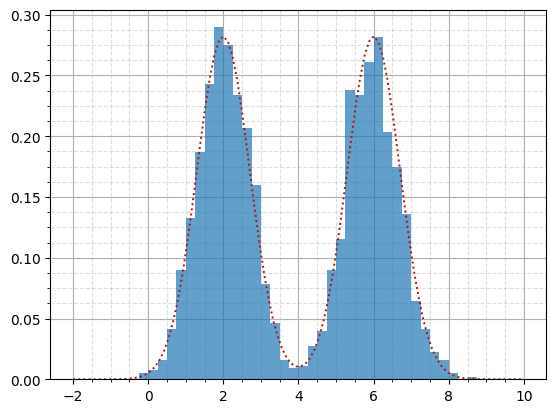

In [70]:
# Example : Slicing sampling
import math

x0=8  # Inital value
m=2   # Estimation of a typical slice
p=5   # Stop condition of doubling interval generation
n=5000 # Sample iters
down_sam = 2 # Down sample rate


f_density = lambda x: np.exp(-(x-2)**2)+np.exp(-(x-6)**2)
norm_coff = .5/math.sqrt(math.pi)

# Generate pdf lines
xlst = np.linspace(-2, 10, 100)
plst = norm_coff*f_density(xlst)

x=x0
samples = []
while n>0:
    # Draw vertical slice
    u = f_density(x)*random.random()

    # Get doubling interval
    # interval = doubling_interval(f_density, x, u, m, p)
    interval = stepping_interval(f_density, x, u, m, p)

    # Get new samples
    x = shrinkage_sample(f_density, x, u, list(interval))
    if n%down_sam==0:
        samples.append(x)
    n-=1

plt.hist(samples, bins=48, range=(-2, 10), density=True, zorder=2, alpha=.7)

plt.plot(xlst, plst, c='#a8160d', lw=1.4, ls='dotted')
ax = plt.gca(); set_minor_ticks(ax)
ax.grid()
ax.grid(which='minor', alpha=.4, ls='--')
plt.show()

In [ ]:

def bivariate_slice_sample(f, x0, w, bounds=None, fixed=False):
    '''
    bounds: [[1, 2], [3, 6]] --> X-bound:[1, 3], Y-bound:[2, 6]
    '''
    
    x=np.array(x0)
    d = x.size
    if bounds is not None:
        bl, br = np.array(bounds)
    if fixed:
        l, r=bl, br
    while True:
        if not fixed:
            l = x-w*np.random.random(d)
            r = l+w
            if bounds is not None:
                l = np.maximum(l, bl)
                r = np.minimum(r, br)

        u = np.random.random()*f(x)

        # rv = l + np.random.random(d)*(r-l)
        # for i, r in enumerate(rv):
        #     if f(

        while True:
            rv = l + np.random.random(d)*(r-l)
            if f(rv)>=u:
                break

            r = np.where(rv>x, rv, r)
            l = np.where(rv<x, rv, l)

        yield rv
        x = rv

        

In [ ]:
# f_density = lambda x: np.exp(-(x-2)**2)+np.exp(-(x-6)**2)

# # Draw pdf 
# tlst = np.linspace(-2, 10, 100)
# ax = plt.subplot()
# ax.plot(tlst, f_density(tlst))

# # Get doubling interval
# x0 = random.randint(2, 6)
# u = f_density(x0)*random.random()
# draw_path([-2, 10], [u, u])
# print(f"locate at: {(x0, u)}")
# print(f"The interval is {doubling_interval(f_density, x0, u, 2, 3)}")

# set_minor_ticks(ax)
# ax.grid()
# ax.grid(which='minor', alpha=.4, ls='--')

(0.8446004309005916, 0.7)


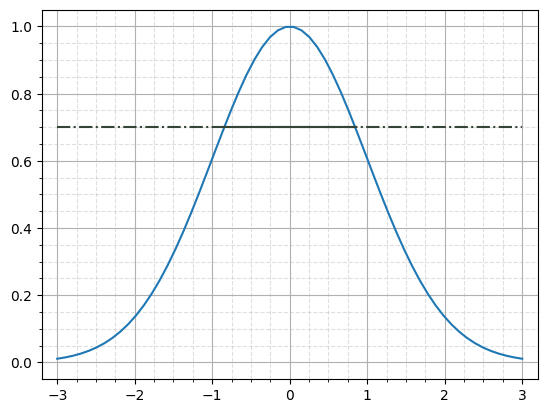

In [58]:
import math
ax = plt.gca()
ax.set_xlim((-3.2, 3.2))
ax.set_ylim((-.05, 1.05))
set_minor_ticks(ax)

x = np.linspace(-3, 3, 60)
y = np.exp(-x**2/2)

u = .7
sx = math.sqrt(-2*math.log(u))


ax.plot(x, y)
p = draw_path([-3, -sx, sx, 3], [u, u, u, u], c='#344538', ls='-.')
ax.plot([-sx, sx], [u, u], c='#344538')
print(p)
print((sx, u))
ax.grid()
ax.grid(which='minor', alpha=.4, ls='--')


plt.show()